<a href="https://colab.research.google.com/github/tvaditya/intro_ds_and_ml/blob/main/Classifica%C3%A7%C3%A3o_bin%C3%A1ria_Cancer_de_mama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 1: Classificação binária: Câncer de mama

## Etapa 1: Importação das bibliotecas

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
import torch
torch.__version__
#!pip install torch==1.4.0

'1.10.0+cu111'

In [8]:
import torch.nn as nn

## Etapa 2: Base de dados

In [9]:
np.random.seed(123)
torch.manual_seed(123)

In [10]:
previsores = pd.read_csv('/content/entradas_breast.csv')
classe = pd.read_csv('/content/saidas_breast.csv')

In [11]:
previsores.shape

(569, 30)

In [12]:
previsores.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1095.0000,0.9053,8589.0,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3398.0,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,186.0000,275.0000,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4585.0,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,243.0000,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1156.0000,3445.0,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,173.00000
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.0000,0.10430,0.1809,0.05883,0.7572,0.7813,5438.0,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,205.0000,0.4000,0.1625,0.2364,0.07678


In [13]:
classe.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
np.unique(classe)

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


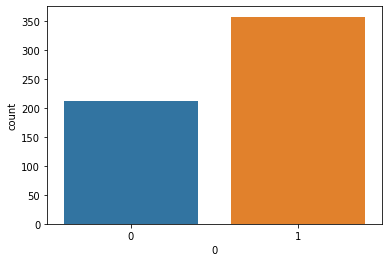

In [15]:
 sns.countplot(classe['0']);

In [16]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores,
                                                                                              classe,
                                                                                              test_size = 0.25)

In [17]:
previsores_treinamento.shape

(426, 30)

In [18]:
classe_treinamento.shape

(426, 1)

In [19]:
previsores_teste.shape

(143, 30)

In [20]:
classe_teste.shape

(143, 1)

## Etapa 3: Transformação dos dados para tensores


In [21]:
type(previsores_treinamento)

pandas.core.frame.DataFrame

In [22]:
type(np.array(previsores_treinamento))

numpy.ndarray

In [23]:
previsores_treinamento = torch.tensor(np.array(previsores_treinamento), dtype=torch.float)
classe_treinamento = torch.tensor(np.array(classe_treinamento), dtype = torch.float)

In [24]:

type(previsores_treinamento)

torch.Tensor

In [25]:

type(classe_treinamento)

torch.Tensor

In [26]:
dataset = torch.utils.data.TensorDataset(previsores_treinamento, classe_treinamento)

In [27]:
type(dataset)

torch.utils.data.dataset.TensorDataset

In [28]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)

## Etapa 4: Construção do modelo

In [29]:
 # 30 -> 16 -> 16 -> 1
# (entradas + saida) / 2 = (30 + 1) / 2 = 16
classificador = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

In [30]:
classificador.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)>

In [31]:
criterion = nn.BCELoss() #Binary Cross Entropy Loss

In [32]:
optimizer = torch.optim.Adam(classificador.parameters(), lr=0.001, weight_decay=0.0001)

## Etapa 5: Treinamento do modelo

In [33]:
for epoch in range(100):
  running_loss = 0.

  for data in train_loader:
    inputs, labels = data
    #print(inputs)
    #print('-----')
    #print(labels)
    optimizer.zero_grad()

    outputs = classificador(inputs) # classificador.forward(inputs)
    #print(outputs)
    loss = criterion(outputs, labels)
    #print(loss)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  print('Época %3d: perda %.5f' % (epoch+1, running_loss/len(train_loader)))

Época   1: perda 10.78336
Época   2: perda 2.84863
Época   3: perda 1.67480
Época   4: perda 1.11414
Época   5: perda 0.63996
Época   6: perda 0.63753
Época   7: perda 0.58066
Época   8: perda 0.55460
Época   9: perda 0.55617
Época  10: perda 0.53322
Época  11: perda 0.55797
Época  12: perda 0.53816
Época  13: perda 0.52938
Época  14: perda 0.33227
Época  15: perda 0.51360
Época  16: perda 0.35532
Época  17: perda 0.49602
Época  18: perda 0.33208
Época  19: perda 0.29349
Época  20: perda 0.25046
Época  21: perda 0.29527
Época  22: perda 0.49888
Época  23: perda 0.47241
Época  24: perda 0.45883
Época  25: perda 0.27544
Época  26: perda 0.23399
Época  27: perda 0.26373
Época  28: perda 0.24136
Época  29: perda 0.28275
Época  30: perda 0.22633
Época  31: perda 0.19294
Época  32: perda 0.22258
Época  33: perda 0.20290
Época  34: perda 0.20888
Época  35: perda 0.20335
Época  36: perda 0.20316
Época  37: perda 0.18855
Época  38: perda 0.22316
Época  39: perda 0.23315
Época  40: perda 0.19261

## Etapa 6: Visualização dos pesos

In [34]:
# 30 -> 16 -> 16 -> 1
params = list(classificador.parameters())

In [35]:
params

[Parameter containing:
 tensor([[-7.0383e-02, -1.1207e-01, -1.8798e-01,  4.7441e-02, -1.5485e-01,
           9.5234e-02, -1.3539e-01, -1.2362e-01, -2.2592e-01,  1.7398e-01,
          -2.5586e-02,  6.2692e-02, -1.2015e-01, -1.0582e-01,  2.0913e-03,
          -2.3384e-01, -3.8969e-01, -3.4844e-02,  9.7729e-02,  5.4830e-03,
           1.3914e-01, -8.6065e-02, -5.0620e-02,  1.3179e-01,  4.8892e-01,
           1.4548e-01, -1.8037e-01,  5.7787e-02,  2.9666e-01,  4.4511e-02],
         [ 1.9552e-01,  2.0509e-01,  2.8965e-01,  1.0102e-01, -1.3337e-01,
          -8.4264e-02, -7.1298e-02, -1.3671e-01, -2.9883e-02,  2.9008e-01,
          -6.3485e-02, -9.0179e-02, -7.8924e-03,  1.6774e-01, -4.7917e-03,
          -8.9527e-02, -1.1098e-02,  2.1501e-01,  7.8884e-02, -1.5008e-02,
           9.8590e-02,  5.6942e-02,  1.9170e-01,  8.7883e-03, -1.6901e-02,
          -2.4835e-01, -1.8176e-01, -1.6588e-02, -6.7060e-02, -1.6873e-01],
         [-1.2614e-02, -6.0502e-02, -2.5585e-01, -1.1376e-01, -2.0406e-02,


In [36]:
# 30 -> 16 -> 16 -> 1
pesos0 = params[0]
pesos0.shape

torch.Size([16, 30])

In [37]:
print(pesos0)

Parameter containing:
tensor([[-7.0383e-02, -1.1207e-01, -1.8798e-01,  4.7441e-02, -1.5485e-01,
          9.5234e-02, -1.3539e-01, -1.2362e-01, -2.2592e-01,  1.7398e-01,
         -2.5586e-02,  6.2692e-02, -1.2015e-01, -1.0582e-01,  2.0913e-03,
         -2.3384e-01, -3.8969e-01, -3.4844e-02,  9.7729e-02,  5.4830e-03,
          1.3914e-01, -8.6065e-02, -5.0620e-02,  1.3179e-01,  4.8892e-01,
          1.4548e-01, -1.8037e-01,  5.7787e-02,  2.9666e-01,  4.4511e-02],
        [ 1.9552e-01,  2.0509e-01,  2.8965e-01,  1.0102e-01, -1.3337e-01,
         -8.4264e-02, -7.1298e-02, -1.3671e-01, -2.9883e-02,  2.9008e-01,
         -6.3485e-02, -9.0179e-02, -7.8924e-03,  1.6774e-01, -4.7917e-03,
         -8.9527e-02, -1.1098e-02,  2.1501e-01,  7.8884e-02, -1.5008e-02,
          9.8590e-02,  5.6942e-02,  1.9170e-01,  8.7883e-03, -1.6901e-02,
         -2.4835e-01, -1.8176e-01, -1.6588e-02, -6.7060e-02, -1.6873e-01],
        [-1.2614e-02, -6.0502e-02, -2.5585e-01, -1.1376e-01, -2.0406e-02,
          4.94

In [38]:
# 30 -> 16 -> 16 -> 1
bias0 = params[1]
bias0.shape

torch.Size([16])

In [39]:
pesos1 = params[2]
pesos1.shape

torch.Size([16, 16])

In [40]:
bias1 = params[3]
bias1.shape

torch.Size([16])

## Etapa 7: Avaliação do modelo

In [41]:
classificador.eval()

Sequential(
  (0): Linear(in_features=30, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=1, bias=True)
  (5): Sigmoid()
)

In [42]:
type(previsores_teste)

pandas.core.frame.DataFrame

In [43]:
previsores_teste = torch.tensor(np.array(previsores_teste), dtype=torch.float)

In [44]:
type(previsores_teste)

torch.Tensor

In [45]:
previsoes = classificador.forward(previsores_teste)

In [46]:
previsoes

tensor([[9.9371e-01],
        [1.0000e+00],
        [3.3997e-01],
        [9.3340e-01],
        [9.9176e-05],
        [8.6613e-01],
        [9.5547e-01],
        [9.9993e-01],
        [7.1825e-01],
        [5.9808e-01],
        [9.2256e-01],
        [9.9886e-01],
        [6.4834e-01],
        [9.9558e-01],
        [9.9420e-01],
        [8.4850e-01],
        [9.9625e-01],
        [1.0000e+00],
        [3.1264e-01],
        [9.9704e-01],
        [2.0332e-10],
        [6.7907e-03],
        [5.9872e-01],
        [1.0000e+00],
        [9.1318e-01],
        [4.3040e-03],
        [7.8452e-01],
        [9.9998e-01],
        [1.0973e-04],
        [9.9773e-01],
        [5.1014e-01],
        [9.9999e-01],
        [9.3493e-01],
        [9.8663e-01],
        [3.8277e-01],
        [9.9741e-01],
        [6.2128e-01],
        [9.9835e-01],
        [9.9550e-01],
        [3.2027e-05],
        [5.0828e-03],
        [9.1321e-01],
        [3.9460e-08],
        [4.0570e-01],
        [4.7972e-05],
        [7

In [47]:
previsoes = np.array(previsoes > 0.5)
previsoes

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

In [48]:
classe_teste

,0
333,1
273,1
201,0
178,1
85,0
...,...
230,0
282,0
535,0
436,1


In [49]:
taxa_acerto = accuracy_score(classe_teste, previsoes)
taxa_acerto

0.8951048951048951

In [50]:
matriz = confusion_matrix(classe_teste, previsoes)
matriz

array([[42, 12],
       [ 3, 86]])

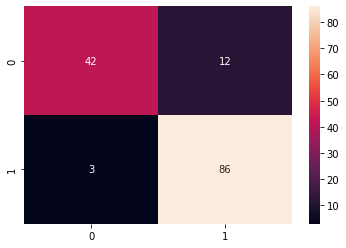

In [51]:
sns.heatmap(matriz, annot=True);